### Visualize gene sequences
Datasets: 
1. https://archive.ics.uci.edu/dataset/69/molecular+biology+splice+junction+gene+sequences
2. https://archive.ics.uci.edu/dataset/67/molecular+biology+promoter+gene+sequences

##### Import necessary libraries

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from kitikiplot.core import KitikiPlot
from kitikiplot.genomics import linear, grid

import random
import pandas as pd

os.chdir("..")

c:\Users\bsnra\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Plot using ```kitikiplot.genomics```

In [3]:
def generate_random_sequence( n ):

    random.seed(111)

    data= list( "ATGCGGGATGC"*n )

    random.shuffle( data )

    return "".join( data )

In [17]:
data= generate_random_sequence( n= 20 )
data

'GTCGGGCAGCGGGTTTTTGATTGGCTCGGGCAGGGGAGTGTCATTCCAGGTGGCGCAAAGGGATATCCCACCTGCCAGGGAAAGCAGGATGGGAAAAGATTGGACTAGGGGTGGGGGAAGCTGCCTCGAGTAGCTTGCGCCGATACGGCTGGGGGTTCGGCGGGAAGGTGGAGCAAGCGGGGGGGGGGTTTGTGATTGGCGTGGCATGGACGCAGGGCCG'

#### Linear Plot

```kitikiplot.genomics.linear.plot( ___ )```

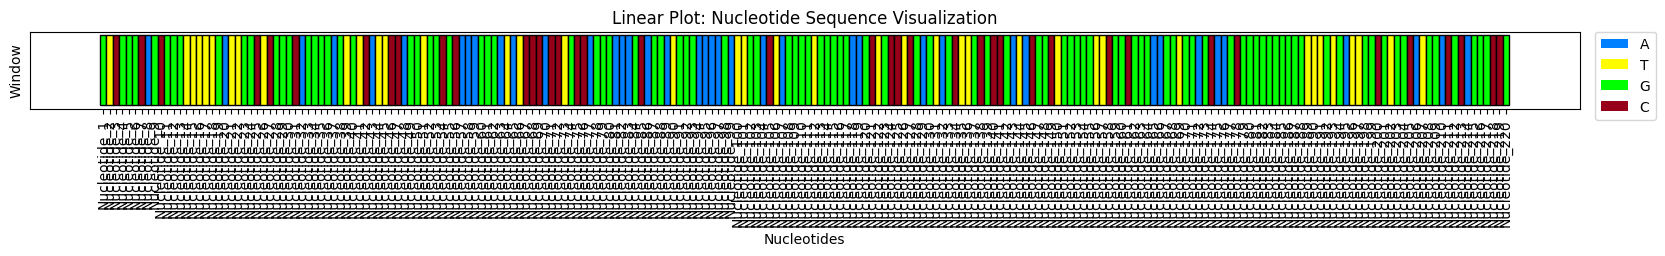

In [ ]:
# Preferred for smaller sequences of around 200 nucleotides
linear.plot( 
                nucleotide_sequence= data
            )

#### Grid Plot

```kitikiplot.genomics.grid.plot( ___ )```

In [28]:
data= generate_random_sequence( n= 30 )
print("Length of nucleotide sequence: ", len(data))
data

Length of nucleotide sequence:  330


'GCGCGGATAGTCGCCGGAGCGATGTAAGGGGGCCCGGCTGCGCTGCTTGGCGGGTGGCAGTGGCTGCTGGGCTGCCCCTTAGTGGGGACTCTGGAGGGGTTGGTTGACCAGAATTCCGGTTGAAGTAAGCGAGGGGGGTAACAGGAGTCATAGGCGGAGCGGGTGATTCGTGCTGCGGTGGTAGGGGCCGGGGTCGGGGGCATCGATGGTTCTGTCTTCGGGAGGGCGCAGGTTTAAGCCGCTGGGAGTAAGGACGGGAAGTAACCAGTGGAGAGGGTCGGGGTGAAGTATCAGAGTGAAATCCAGTGGGCCGCGGGGAAGAGAGGACAG'

Default 'window_length= 30'

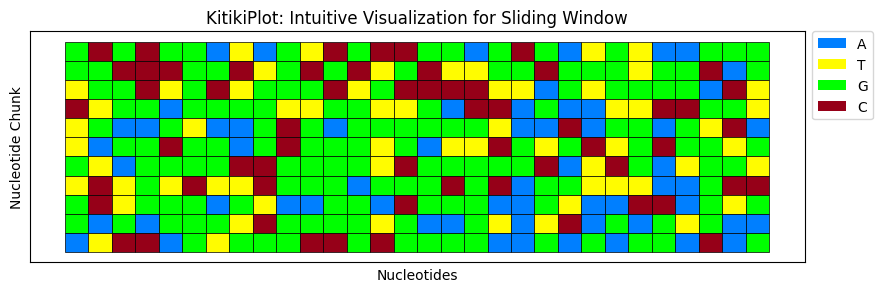

In [29]:
grid.plot( nucleotide_sequence= data )

Set 'window_length= 40'

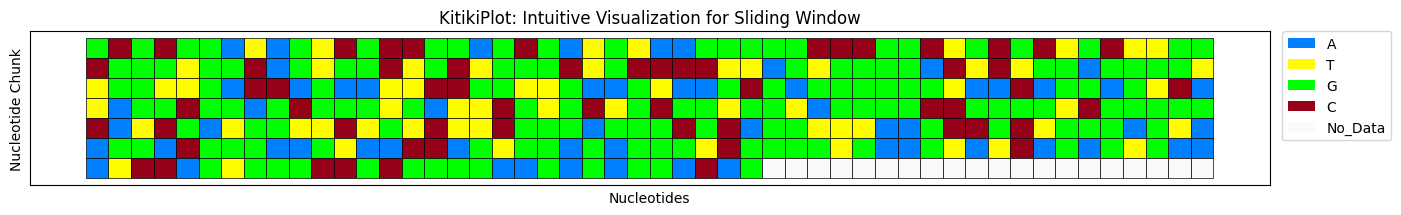

In [37]:
grid.plot( nucleotide_sequence= data, window_length= 50 )

Set 'window_length= 10'

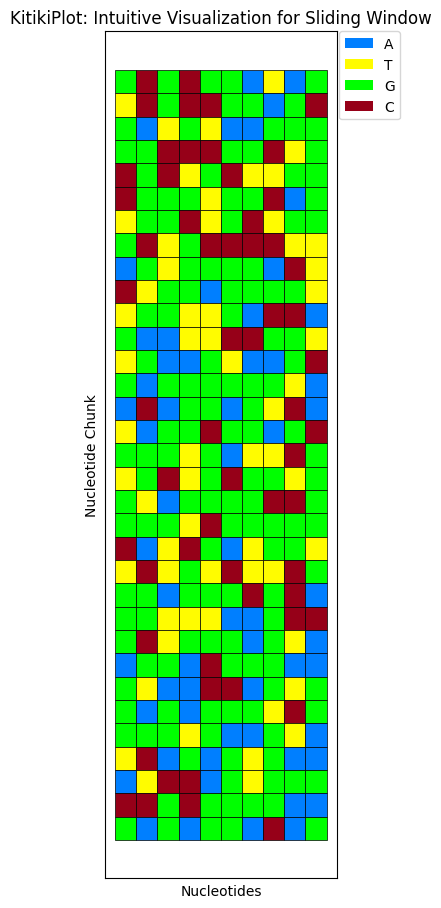

In [38]:
grid.plot( nucleotide_sequence= data, window_length= 10 )

Set 'window_length= 5'

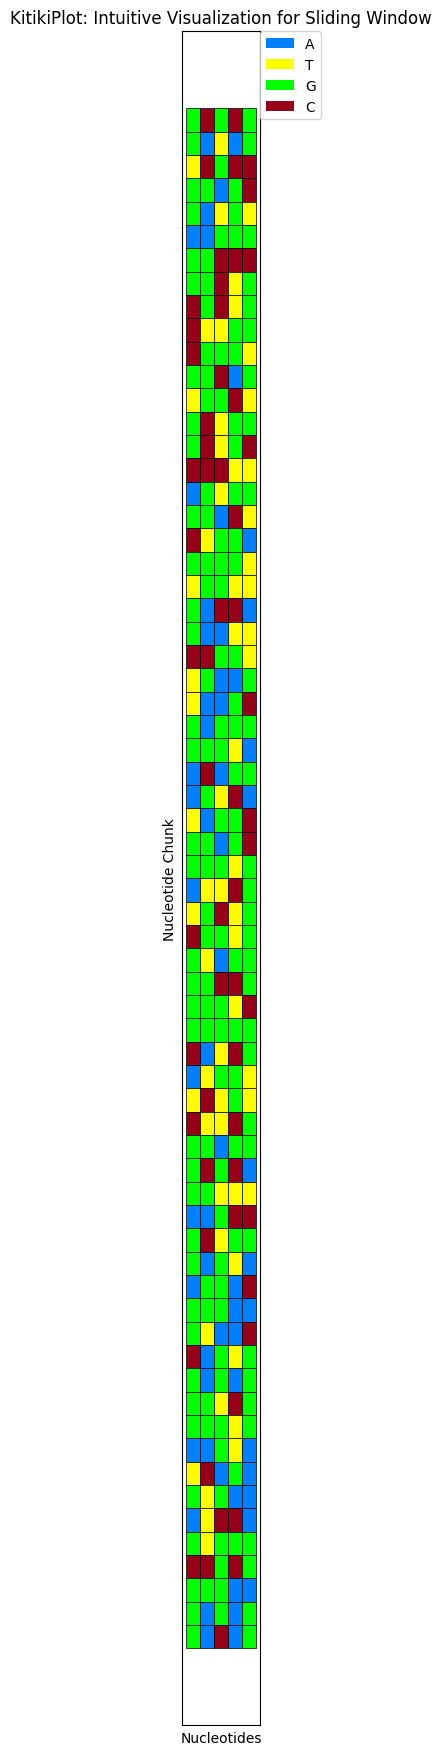

In [39]:
grid.plot( nucleotide_sequence= data, window_length= 5 )

### Plot using ```kitikiplot.core.KitikiPlot```

In [5]:
df= pd.read_csv( "datasets/molecular+biology+splice+junction+gene+sequences/splice.data", header= None )

# Rename the columns
df.columns= ["Label", "Instance_Name", "Nucleotide_Sequence"]

# Select 3 gene sequences randomly
df= df.sample(3, random_state= 1)

# Remove the white spaces from the "Nucleotide_Sequence"
df["Nucleotide_Sequence"]= df["Nucleotide_Sequence"].str.strip()

df

,Label,Instance_Name,Nucleotide_Sequence
1675,N,HUMAMY2A-NEG-361,TGGGTTGATATTGCTCTTGAATGTGAGCGATATTTAGCTCCGAAGG...
1002,IE,HUMCSFGMA-ACCEPTOR-1620,CTGCTCACCGACGAACGACATTTTCCACAGGAGCCGACCTGCCTAC...
2708,N,HUMNFM-NEG-1921,GGCCGCTCGCTAGAGCACGCGCGCCGCAGACCTAGGGTATTTGCGG...


In [4]:
df.iloc[1]["Nucleotide_Sequence"]

'CTGCTCACCGACGAACGACATTTTCCACAGGAGCCGACCTGCCTACAGACCCGCCTGGAG'

In [4]:
from kitikiplot.core import KitikiPlot

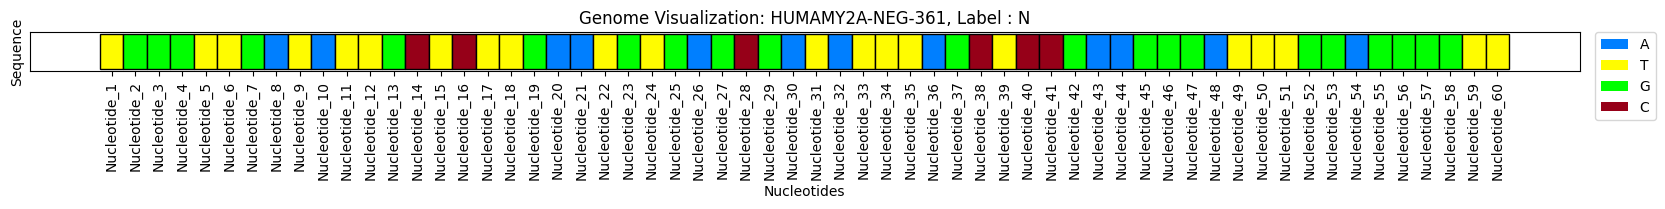

In [6]:
index= 0

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= len(df.iloc[index, 2]) )

ktk.plot(
        figsize= (20, 0.5),
        cell_width= 2,
        cmap= {'A': '#007FFF', 'T': "#fffc00", "G": "#00ff00", "C": "#960018"},
        transpose= True,
        xlabel= "Nucleotides",
        ylabel= "Sequence",
        display_yticks= False,
        xtick_prefix= "Nucleotide",
        xticks_rotation= 90,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

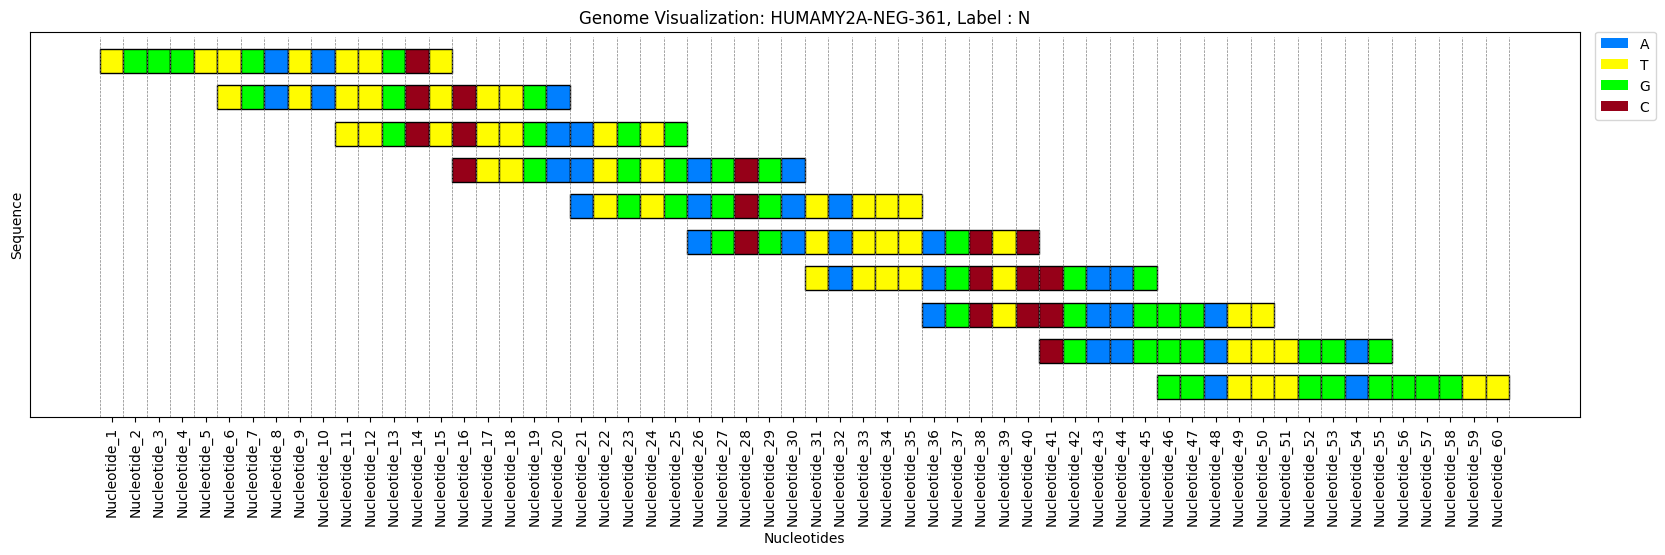

In [7]:
index= 0

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 5, window_length= 15 )

ktk.plot(
        figsize= (20, 5),
        cell_width= 2,
        cmap= {'A': '#007FFF', 'T': "#fffc00", "G": "#00ff00", "C": "#960018"},
        transpose= True,
        xlabel= "Nucleotides",
        ylabel= "Sequence",
        display_yticks= False,
        display_grid= True,
        xtick_prefix= "Nucleotide",
        xticks_rotation= 90,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

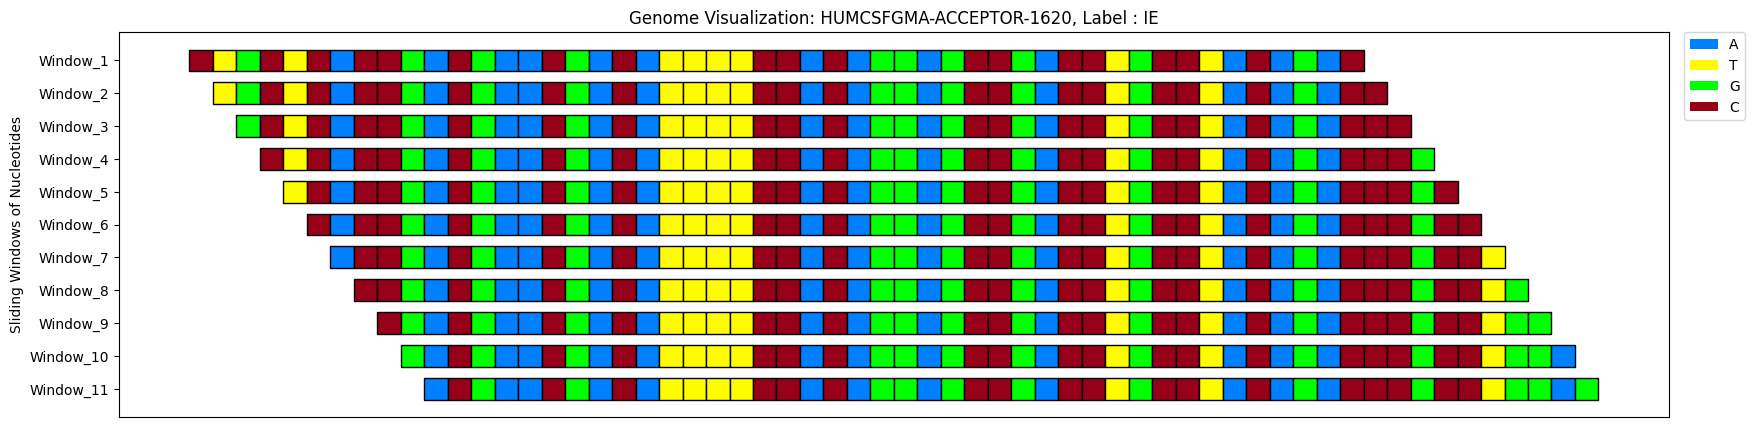

In [8]:
index= 1

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= 50 )

ktk.plot(
        figsize= (20, 5),
        cell_width= 2,
        cmap= {'A': '#007FFF', 'T': "#fffc00", "G": "#00ff00", "C": "#960018"},
        transpose= True,
        xlabel= "",
        ylabel= "Sliding Windows of Nucleotides",
        display_xticks= False,
        ytick_prefix= "Window",
        xticks_rotation= 90, 
        display_legend= True,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

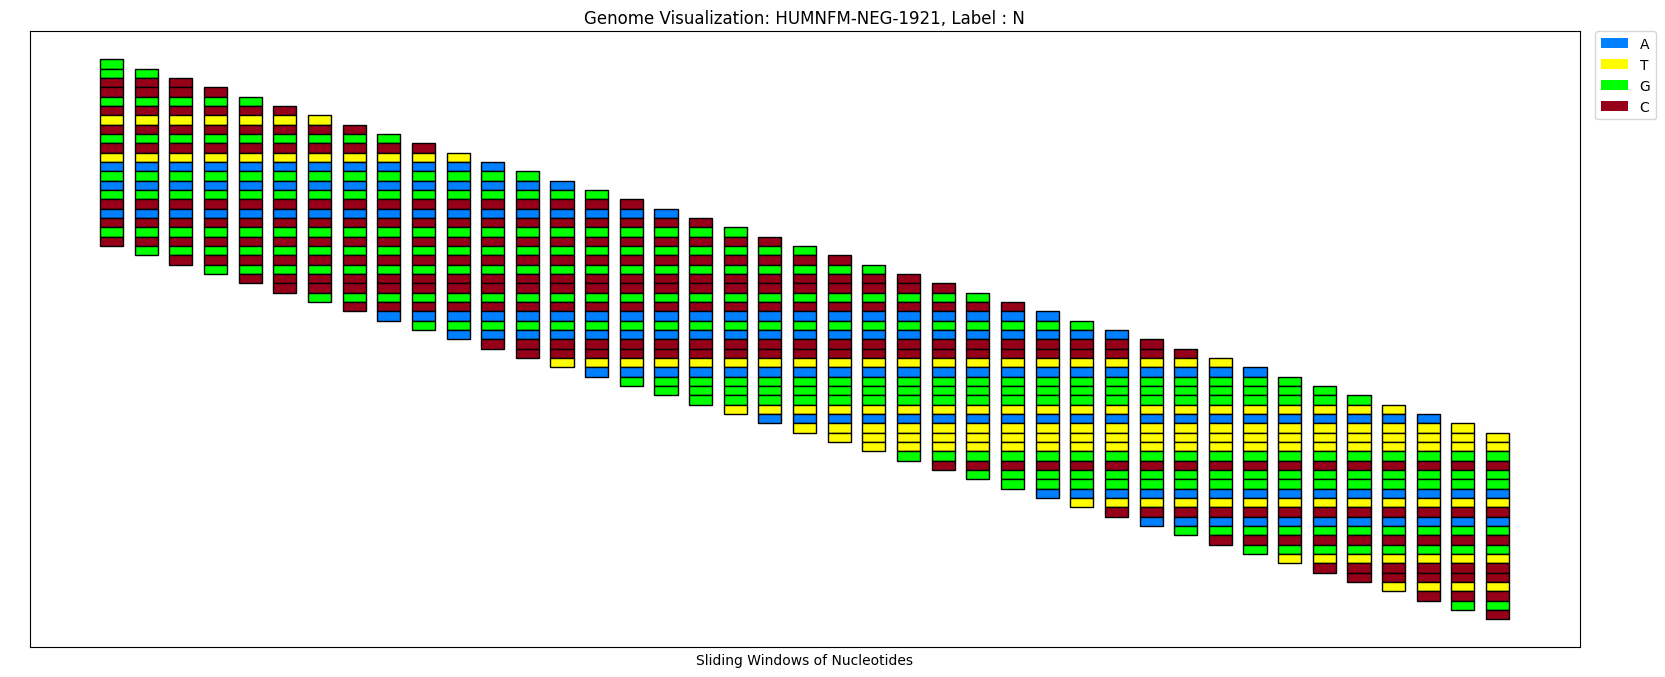

In [9]:
index= 2

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= 20 )

ktk.plot(
        figsize= (20, 8),
        cell_width= 2,
        cmap= {'A': '#007FFF', 'T': "#fffc00", "G": "#00ff00", "C": "#960018"},
        transpose= False,
        xlabel= "Sliding Windows of Nucleotides",
        ylabel= " ",
        display_xticks= False,
        display_yticks= False,
        xticks_rotation= 90, 
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

In [10]:
df= pd.read_csv( "datasets/molecular+biology+promoter+gene+sequences/promoters.data", header= None )

# Rename the columns
df.columns= ["Label", "Instance_Name", "Nucleotide_Sequence"]

# Select 3 gene sequences randomly
df= df.sample(3, random_state= 1)

# Remove the white spaces from the "Nucleotide_Sequence"
df["Nucleotide_Sequence"]= df["Nucleotide_Sequence"].str.strip()

df

,Label,Instance_Name,Nucleotide_Sequence
66,-,1203,ttactgtgaacattattcgtctccgcgactacgatgagatgcctga...
35,+,SUBB-E,ccttgaaaaagaggttgacgctgcaaggctctatacgcataatgcg...
59,-,1024,tggatggacgttcaacattgaggaaggcataacgctactacctgat...


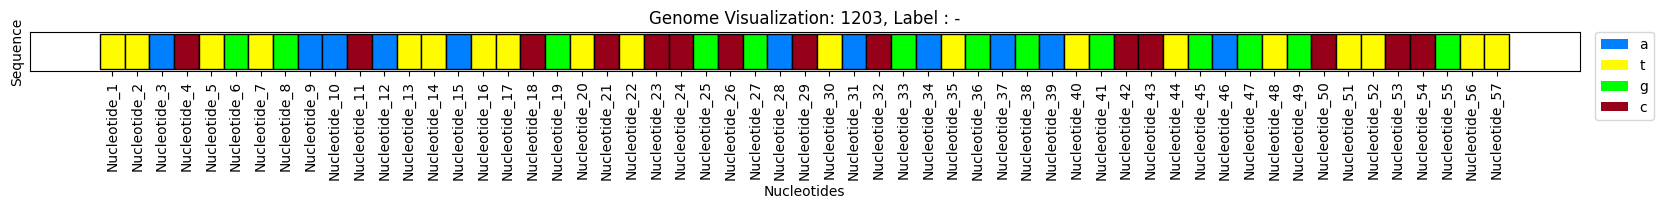

In [11]:
index= 0

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= len(df.iloc[index, 2]) )

ktk.plot(
        figsize= (20, 0.5),
        cell_width= 2,
        cmap= {'a': '#007FFF', 't': "#fffc00", "g": "#00ff00", "c": "#960018"},
        transpose= True,
        xlabel= "Nucleotides",
        ylabel= "Sequence",
        display_yticks= False,
        xtick_prefix= "Nucleotide",
        xticks_rotation= 90,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

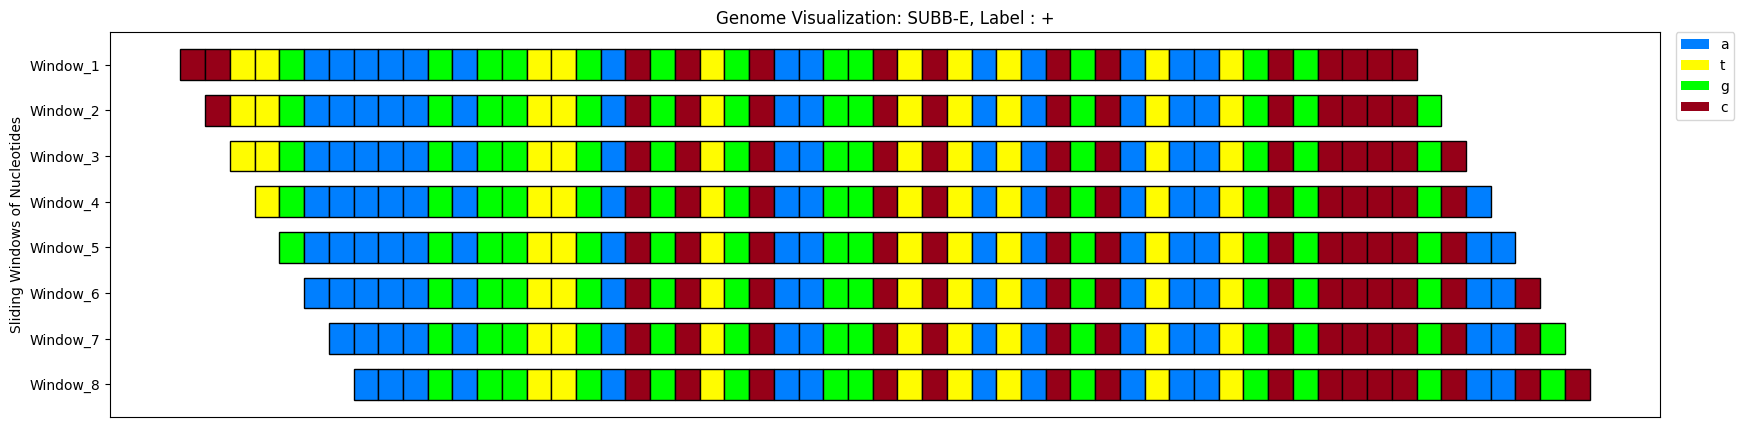

In [12]:
index= 1

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= 50 )

ktk.plot(
        figsize= (20, 5),
        cell_width= 2,
        cmap= {'a': '#007FFF', 't': "#fffc00", "g": "#00ff00", "c": "#960018"},
        transpose= True,
        xlabel= "",
        ylabel= "Sliding Windows of Nucleotides",
        display_xticks= False,
        ytick_prefix= "Window",
        xticks_rotation= 90, 
        display_legend= True,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

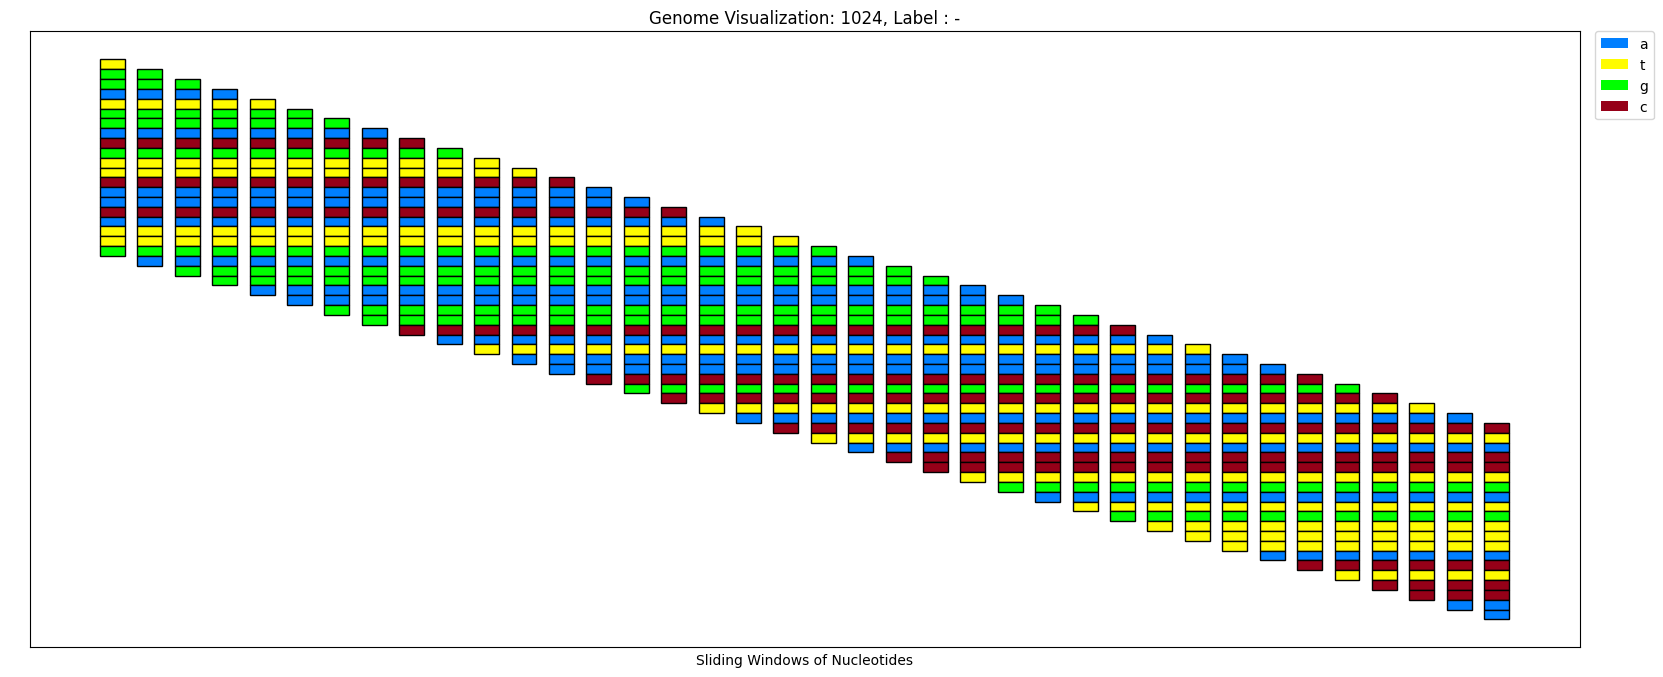

In [13]:
index= 2

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= 20 )

ktk.plot(
        figsize= (20, 8),
        cell_width= 2,
        cmap= {'a': '#007FFF', 't': "#fffc00", "g": "#00ff00", "c": "#960018"},
        transpose= False,
        xlabel= "Sliding Windows of Nucleotides",
        ylabel= " ",
        display_xticks= False,
        display_yticks= False,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

END
______